In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
import agents_enviroments
np.random.seed(12314)
random.seed(12314)

In [2]:
bays = [agents_enviroments.Bay() for _ in range(10)]
isobays = [agents_enviroments.IsolationBay() for _ in range(6)]
bays += isobays
params = agents_enviroments.Parameters(C= 0.3 ,V=1, m=0.9, k=0.4,treatment_prob=0.9,isolation_prob=0.01,screen_interval=5,result_length=4)
ward = agents_enviroments.Ward(bays,params=params)


150


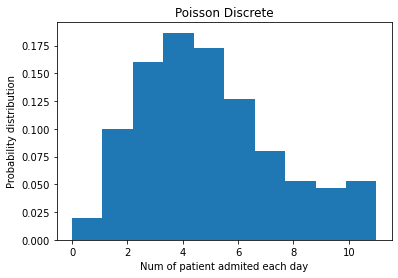

753


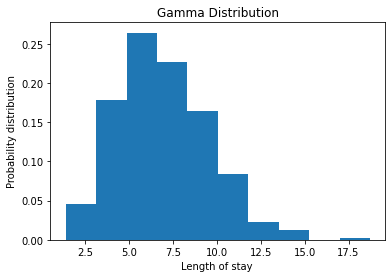

In [3]:
patient_generator = agents_enviroments.PatientGenerator()
patient_generator.set_var(poisson_lambda=5,gamma_k=7,gamma_scale=1)
# patient_generator.set_col_length_dist(gamma_k=11,gamma_scale=1)
patient_sequence = patient_generator.generate_sequence(colonized_prob=0.02,time=150)
patient_generator.show_admit()
patient_generator.show_length_stay()

In [1]:
from agents_enviroments import History
from agents_enviroments.movement_strategy import GroupInfectedStrategy, IsolateInfectedStrategy
strategies : List[MovementStrategy]= [GroupInfectedStrategy(), IsolateInfectedStrategy()]
history = History() 
history.reset()
for patients in patient_sequence:
    ward.remove_patients()
    ward.screen_patients()
    ward.get_patient_results()
    ward.admit_patients(patients=patients)
    ward.generate_transmission()
    ward.generate_treatment()
    for strategy in strategies:
        strategy.move_patients(ward)
    history.add_from_dict(ward.history_dict())
    ward.forward_time()
    

IndentationError: expected an indented block (3376559875.py, line 14)

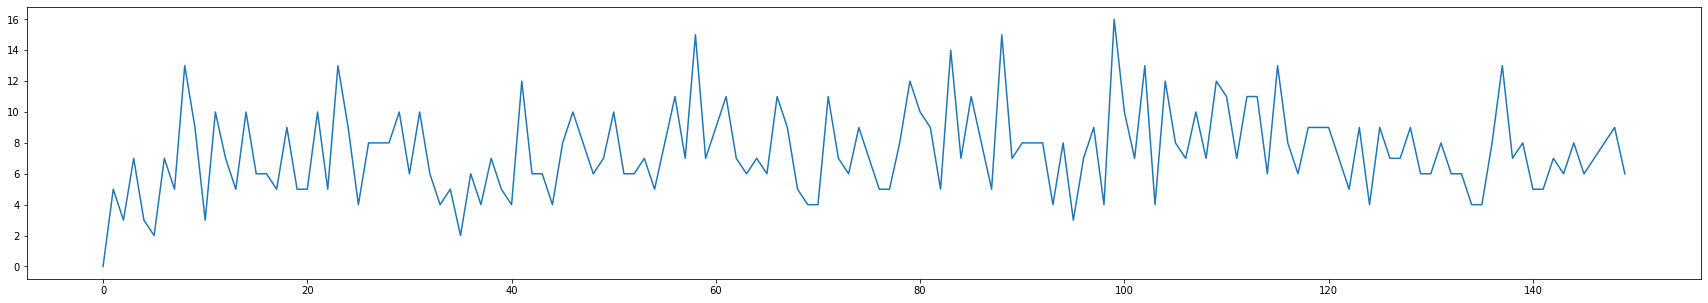

In [5]:
plt.figure(figsize=(30,5))
plt.plot(history.time,history.screened)

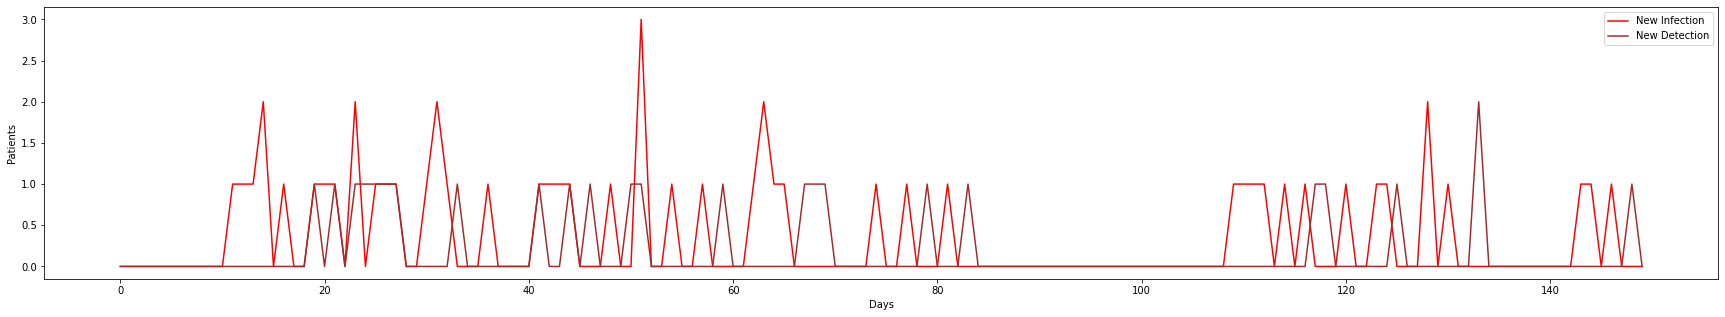

In [6]:
plt.figure(figsize=(30,5))
# plt.plot(history.time,history.screened)
plt.plot(history.time,history.new_infections, color='red')
plt.plot(history.time,history.new_detected, color='brown')
plt.legend(["New Infection","New Detection"])
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()

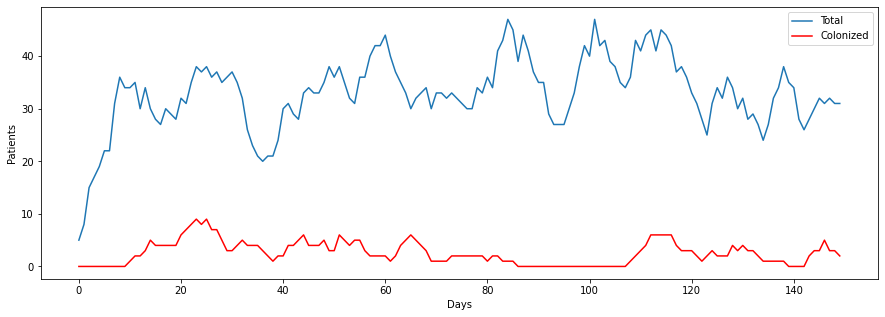

In [7]:
plt.figure(figsize=(15,5))
plt.plot(history.time,history.total)
plt.plot(history.time,history.colonized, color='red')
# plt.plot(history.time,history.healed, color='brown')
# plt.legend(["Total","Colonized","Healed"])
plt.legend(["Total","Colonized"])
plt.xlabel("Days")
plt.ylabel("Patients")
plt.show()

In [8]:
print("Primary Cases =" ,ward.primary_cases)
print("Secondary Cases =" ,ward.secondary_cases)
print("Percentage secondary/primary(%) =" ,ward.secondary_cases*100/ward.primary_cases)
print("Percentage secondary/total(%) =" ,ward.secondary_cases*100/(ward.primary_cases+ward.secondary_cases))
print("Total Screening",sum(history.screened))
print("Total Detection",sum(history.new_detected))
print("Detection per screened (%)",sum(history.new_detected)*100/sum(history.screened))

Primary Cases = 15
Secondary Cases = 52
Percentage secondary/primary(%) = 346.6666666666667
Percentage secondary/total(%) = 77.61194029850746
Total Screening 1113.0
Total Detection 25.0
Detection per screened (%) 2.2461814914645104
